In [116]:
import pandas as pd
from datetime import datetime
import ta
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [117]:
data=pd.read_csv(r'F:\DATA\index\NIFTY50\NIFTY50.csv')
MAX_SHORT_SL_POINTS = 6
MAX_LONG_SL_POINTS = 12
data.head()


symbol          datetime     open     high      low    close  volume
0  NIFTY50  17-07-2017 09:15  9908.15  9908.50  9900.50  9900.50       0
1  NIFTY50  17-07-2017 09:16  9901.90  9905.85  9899.50  9904.35       0
2  NIFTY50  17-07-2017 09:17  9904.45  9906.80  9903.30  9903.30       0
3  NIFTY50  17-07-2017 09:18  9903.35  9908.90  9903.35  9907.80       0
4  NIFTY50  17-07-2017 09:19  9907.00  9911.60  9905.35  9910.15       0

In [118]:
data = data[["datetime", "open", "high", "low", "close"]]



In [119]:
data.rename(columns={"datetime": "date"}, inplace=True)
data.head()


date     open     high      low    close
0  17-07-2017 09:15  9908.15  9908.50  9900.50  9900.50
1  17-07-2017 09:16  9901.90  9905.85  9899.50  9904.35
2  17-07-2017 09:17  9904.45  9906.80  9903.30  9903.30
3  17-07-2017 09:18  9903.35  9908.90  9903.35  9907.80
4  17-07-2017 09:19  9907.00  9911.60  9905.35  9910.15

In [120]:
data["Date"] = data["date"].str.split(" ").str[0]
data["Time"] = data["date"].str.split(" ").str[1].str.split("+").str[0]
data["Date_Time"] = data['Date'] + " " + data["Time"]
data.drop("Date", axis = 1, inplace = True)
data


date      open      high       low     close   Time  \
0       17-07-2017 09:15   9908.15   9908.50   9900.50   9900.50  09:15   
1       17-07-2017 09:16   9901.90   9905.85   9899.50   9904.35  09:16   
2       17-07-2017 09:17   9904.45   9906.80   9903.30   9903.30  09:17   
3       17-07-2017 09:18   9903.35   9908.90   9903.35   9907.80  09:18   
4       17-07-2017 09:19   9907.00   9911.60   9905.35   9910.15  09:19   
...                  ...       ...       ...       ...       ...    ...   
503018  20-12-2022 15:25  18387.65  18390.10  18387.65  18389.90  15:25   
503019  20-12-2022 15:26  18389.40  18392.10  18388.90  18391.85  15:26   
503020  20-12-2022 15:27  18392.10  18393.55  18389.65  18392.70  15:27   
503021  20-12-2022 15:28  18392.65  18393.15  18387.55  18387.55  15:28   
503022  20-12-2022 15:29  18388.55  18388.95  18383.95  18385.85  15:29   

               Date_Time  
0       17-07-2017 09:15  
1       17-07-2017 09:16  
2       17-07-2017 09:17  
3       17-07-2017 09:18  
4       17-07-2017 09:19  
...                  ...  
503018  20-12-2022 15:25  
503019  20-12-2022 15:26  
503020  20-12-2022 15:27  
503021  20-12-2022 15:28  
503022  20-12-2022 15:29  

[503023 rows x 7 columns]

In [121]:
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y %H:%M').dt.strftime('%Y-%m-%d %H:%M:%S%z')
data.head()


date     open     high      low    close   Time  \
0  2017-07-17 09:15:00  9908.15  9908.50  9900.50  9900.50  09:15   
1  2017-07-17 09:16:00  9901.90  9905.85  9899.50  9904.35  09:16   
2  2017-07-17 09:17:00  9904.45  9906.80  9903.30  9903.30  09:17   
3  2017-07-17 09:18:00  9903.35  9908.90  9903.35  9907.80  09:18   
4  2017-07-17 09:19:00  9907.00  9911.60  9905.35  9910.15  09:19   

          Date_Time  
0  17-07-2017 09:15  
1  17-07-2017 09:16  
2  17-07-2017 09:17  
3  17-07-2017 09:18  
4  17-07-2017 09:19

In [122]:
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'] - pd.DateOffset(hours=5, minutes=30)
data['date'] = pd.to_datetime(data['date']).dt.strftime('%Y-%m-%d %H:%M:%S+05:30')
data.head()

date     open     high      low    close   Time  \
0  2017-07-17 03:45:00+05:30  9908.15  9908.50  9900.50  9900.50  09:15   
1  2017-07-17 03:46:00+05:30  9901.90  9905.85  9899.50  9904.35  09:16   
2  2017-07-17 03:47:00+05:30  9904.45  9906.80  9903.30  9903.30  09:17   
3  2017-07-17 03:48:00+05:30  9903.35  9908.90  9903.35  9907.80  09:18   
4  2017-07-17 03:49:00+05:30  9907.00  9911.60  9905.35  9910.15  09:19   

          Date_Time  
0  17-07-2017 09:15  
1  17-07-2017 09:16  
2  17-07-2017 09:17  
3  17-07-2017 09:18  
4  17-07-2017 09:19

In [123]:
data['Date_Time'] = pd.to_datetime(data['Date_Time'], format='%d-%m-%Y %H:%M')

# Set 'Date_Time' column as index
data.index = data['Date_Time']

# Drop 'date' column
data.drop(["date"], axis=1, inplace=True)

# Create 'Next Date_Time' column
data["Next Date_Time"] = data["Date_Time"].shift(-1)

In [124]:
data.head()

open     high      low    close   Time  \
Date_Time                                                        
2017-07-17 09:15:00  9908.15  9908.50  9900.50  9900.50  09:15   
2017-07-17 09:16:00  9901.90  9905.85  9899.50  9904.35  09:16   
2017-07-17 09:17:00  9904.45  9906.80  9903.30  9903.30  09:17   
2017-07-17 09:18:00  9903.35  9908.90  9903.35  9907.80  09:18   
2017-07-17 09:19:00  9907.00  9911.60  9905.35  9910.15  09:19   

                              Date_Time      Next Date_Time  
Date_Time                                                    
2017-07-17 09:15:00 2017-07-17 09:15:00 2017-07-17 09:16:00  
2017-07-17 09:16:00 2017-07-17 09:16:00 2017-07-17 09:17:00  
2017-07-17 09:17:00 2017-07-17 09:17:00 2017-07-17 09:18:00  
2017-07-17 09:18:00 2017-07-17 09:18:00 2017-07-17 09:19:00  
2017-07-17 09:19:00 2017-07-17 09:19:00 2017-07-17 09:20:00

In [125]:
def convert_timeframe(data, tf):
    data = data.copy() #  To avoid modifying the original DataFrame

    new_data = {
    "Date_Time" : [],
    "Open" : [],
    "High" : [],
    "Low" : [],
    "Close" : []
    }

    step = 0

    for i in data.index:


        step += 1
        if step == 1:
            o = data.loc[i, "open"] 
            t = i
            h = data.loc[i, "high"] 
            l = data.loc[i, "low"]

        else:
            if data.loc[i, "high"]>h:
                h = data.loc[i, "high"]

            if data.loc[i, "low"] < l:
                l = data.loc[i, "low"]

        if step == tf or i.day!= data.loc[i, "Next Date_Time"].day: 
            step = 0
            c = data.loc[i, "close"]
            new_data["Date_Time"].append(t)
            new_data["Open"].append(o) 
            new_data["High"].append(h)
            new_data["Low"].append(l) 
            new_data["Close"].append(c)
    return pd.DataFrame(new_data)

data15 = convert_timeframe(data, 15)

data5 = convert_timeframe(data, 5)

data5_original = data5.copy()

data15_original = data15.copy()

data15

Date_Time      Open      High       Low     Close
0     2017-07-17 09:15:00   9908.15   9913.90   9899.50   9911.65
1     2017-07-17 09:30:00   9911.95   9915.15   9894.85   9897.70
2     2017-07-17 09:45:00   9899.05   9916.25   9898.45   9915.35
3     2017-07-17 10:00:00   9915.10   9916.70   9907.15   9915.30
4     2017-07-17 10:15:00   9915.45   9920.30   9911.80   9916.05
...                   ...       ...       ...       ...       ...
33602 2022-12-20 14:15:00  18299.00  18333.85  18292.65  18328.60
33603 2022-12-20 14:30:00  18328.95  18344.40  18319.05  18331.70
33604 2022-12-20 14:45:00  18331.45  18341.70  18313.15  18336.90
33605 2022-12-20 15:00:00  18335.05  18404.90  18335.05  18399.60
33606 2022-12-20 15:15:00  18399.50  18401.75  18381.55  18385.85

[33607 rows x 5 columns]

In [126]:
data5

Date_Time      Open      High       Low     Close
0      2017-07-17 09:15:00   9908.15   9911.60   9899.50   9910.15
1      2017-07-17 09:20:00   9910.20   9910.20   9901.45   9907.65
2      2017-07-17 09:25:00   9907.45   9913.90   9906.05   9911.65
3      2017-07-17 09:30:00   9911.95   9915.15   9907.20   9909.00
4      2017-07-17 09:35:00   9908.95   9909.00   9898.75   9903.75
...                    ...       ...       ...       ...       ...
100665 2022-12-20 15:05:00  18369.25  18390.90  18369.25  18390.65
100666 2022-12-20 15:10:00  18391.00  18404.90  18390.90  18399.60
100667 2022-12-20 15:15:00  18399.50  18401.75  18381.55  18386.15
100668 2022-12-20 15:20:00  18386.15  18394.85  18383.55  18388.25
100669 2022-12-20 15:25:00  18387.65  18393.55  18383.95  18385.85

[100670 rows x 5 columns]

In [127]:
status = None
alert_candle = None
position = None
short_at = None
stop_loss = None

data5 = data5_original.copy()
data5["5EMA"] = ta.trend.EMAIndicator(data5["Close"], 5).ema_indicator()
day = None

for i in data5.index:
    if position is None:
        if alert_candle is None:  # Previous Candle is not an alert candle
            if data5.loc[i, "5EMA"] < data5.loc[i, "Low"]:  # Alert Candle
                alert_candle = i
                data5.loc[i, "ALERT"] = "ALERT"
        else:  # Previous Candle is an alert candle -> Try to take position
            if data5.loc[i, "Low"] < data5.loc[alert_candle, "Low"]:
                position = "SHORT"
                data5.loc[i, "POSITION"] = "ENTRY"
                if data5.loc[i, "Date_Time"].day != day:
                    data5.loc[i, "Days fund required"] = 1
                    day = data5.loc[i, "Date_Time"].day
                short_at = data5.loc[alert_candle, "Low"]
                stop_loss = min(data5.loc[alert_candle, "High"], short_at + MAX_SHORT_SL_POINTS)
                original_sl = stop_loss
                target = short_at - 3 * (stop_loss - short_at)
                data5.loc[i, "TARGET"] = target
                data5.loc[i, "SL"] = stop_loss
                data5.loc[i, "ENTRY_AT"] = short_at
                alert_candle = None
            elif data5.loc[i, "5EMA"] < data5.loc[i, "Low"]:  # Check for once again alert
                alert_candle = i
                data5.loc[i, "ALERT"] = "ALERT"
            else:
                alert_candle = None
    else:
        data5.loc[i, "POSITION"] = "HOLD"
        data5.loc[i, "SL"] = stop_loss
        data5.loc[i, "TARGET"] = target
        data5.loc[i, "ENTRY_AT"] = short_at
        
        if data5.loc[i, "Low"] <= target:
            data5.loc[i, "POSITION"] = "TRAIL"
            temp = target - (original_sl - short_at)
            stop_loss = target
            target = temp
            data5.loc[i, "SL"] = stop_loss
            data5.loc[i, "TARGET"] = target
        elif data5.loc[i, "High"] >= stop_loss:
            data5.loc[i, "POSITION"] = "EXIT"
            position = None
            profit = short_at - stop_loss
            data5.loc[i, "PROFIT"] = profit
            data5.loc[i, "EXIT_AT"] = stop_loss




C:\Users\A\AppData\Local\Temp\ipykernel_9764\3714796340.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'ALERT' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data5.loc[i, "ALERT"] = "ALERT"
C:\Users\A\AppData\Local\Temp\ipykernel_9764\3714796340.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'ENTRY' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data5.loc[i, "POSITION"] = "ENTRY"


In [128]:
data5.iloc[4223:4257]

Date_Time     Open     High      Low    Close         5EMA  \
4223 2017-10-05 12:59:00  9902.75  9903.00  9898.75  9900.60  9901.319887   
4224 2017-10-05 13:04:00  9900.60  9906.95  9900.45  9904.85  9902.496591   
4225 2017-10-05 13:09:00  9904.65  9908.25  9902.55  9907.95  9904.314394   
4226 2017-10-05 13:14:00  9908.15  9908.35  9904.75  9906.25  9904.959596   
4227 2017-10-05 13:19:00  9906.25  9906.55  9903.30  9904.05  9904.656397   
4228 2017-10-05 13:24:00  9904.05  9904.35  9897.85  9899.40  9902.904265   
4229 2017-10-05 13:29:00  9899.45  9901.60  9898.05  9900.65  9902.152843   
4230 2017-10-05 13:34:00  9900.75  9905.30  9900.75  9904.95  9903.085229   
4231 2017-10-05 13:39:00  9904.70  9911.65  9903.05  9910.00  9905.390153   
4232 2017-10-05 13:44:00  9910.10  9920.45  9910.10  9917.90  9909.560102   
4233 2017-10-05 13:49:00  9918.25  9919.65  9915.40  9916.05  9911.723401   
4234 2017-10-05 13:54:00  9916.05  9920.30  9914.90  9919.25  9914.232267   
4235 2017-10-05 13:59:00  9918.70  9922.55  9918.50  9918.60  9915.688178   
4236 2017-10-05 14:04:00  9918.65  9920.65  9907.90  9907.95  9913.108786   
4237 2017-10-05 14:09:00  9908.20  9912.25  9905.75  9910.00  9912.072524   
4238 2017-10-05 14:14:00  9910.00  9912.95  9908.65  9911.35  9911.831682   
4239 2017-10-05 14:19:00  9911.00  9915.30  9911.00  9911.10  9911.587788   
4240 2017-10-05 14:24:00  9910.95  9912.65  9907.30  9911.20  9911.458526   
4241 2017-10-05 14:29:00  9910.95  9913.30  9908.45  9909.80  9910.905684   
4242 2017-10-05 14:34:00  9909.40  9911.75  9904.00  9906.80  9909.537122   
4243 2017-10-05 14:39:00  9907.15  9913.35  9906.80  9911.45  9910.174748   
4244 2017-10-05 14:44:00  9911.40  9913.05  9906.80  9909.35  9909.899832   
4245 2017-10-05 14:49:00  9909.55  9911.65  9907.90  9908.75  9909.516555   
4246 2017-10-05 14:54:00  9908.50  9909.80  9901.65  9901.65  9906.894370   
4247 2017-10-05 14:59:00  9902.00  9904.55  9897.05  9898.70  9904.162913   
4248 2017-10-05 15:04:00  9898.45  9900.75  9894.45  9894.45  9900.925275   
4249 2017-10-05 15:09:00  9895.05  9897.15  9884.10  9884.60  9895.483517   
4250 2017-10-05 15:14:00  9884.65  9887.45  9881.95  9886.60  9892.522345   
4251 2017-10-05 15:19:00  9887.10  9888.45  9884.05  9886.45  9890.498230   
4252 2017-10-05 15:24:00  9886.65  9888.85  9885.00  9888.35  9889.782153   
4253 2017-10-05 15:29:00  9887.55  9888.80  9885.00  9887.10  9888.888102   
4254 2017-10-06 09:14:00  9908.15  9932.95  9907.65  9931.55  9903.108735   
4255 2017-10-06 09:19:00  9931.05  9939.15  9930.85  9936.45  9914.222490   
4256 2017-10-06 09:24:00  9935.80  9938.75  9930.05  9934.00  9920.814993   

      ALERT POSITION  Days fund required   TARGET       SL  ENTRY_AT  PROFIT  \
4223    NaN     HOLD                 NaN  9891.00  9906.80   9902.85     NaN   
4224    NaN     EXIT                 NaN  9891.00  9906.80   9902.85   -3.95   
4225    NaN      NaN                 NaN      NaN      NaN       NaN     NaN   
4226    NaN      NaN                 NaN      NaN      NaN       NaN     NaN   
4227    NaN      NaN                 NaN      NaN      NaN       NaN     NaN   
4228    NaN      NaN                 NaN      NaN      NaN       NaN     NaN   
4229    NaN      NaN                 NaN      NaN      NaN       NaN     NaN   
4230    NaN      NaN                 NaN      NaN      NaN       NaN     NaN   
4231    NaN      NaN                 NaN      NaN      NaN       NaN     NaN   
4232  ALERT      NaN                 NaN      NaN      NaN       NaN     NaN   
4233  ALERT      NaN                 NaN      NaN      NaN       NaN     NaN   
4234    NaN    ENTRY                 NaN  9902.65  9919.65   9915.40     NaN   
4235    NaN     EXIT                 NaN  9902.65  9919.65   9915.40   -4.25   
4236    NaN      NaN                 NaN      NaN      NaN       NaN     NaN   
4237    NaN      NaN                 NaN      NaN      NaN       NaN     NaN   
4238    NaN      NaN                 Na

In [129]:
data5.index=data5["Date_Time"] 

In [130]:
data5["PROFIT"].resample("A").sum()

Date_Time
2017-12-31     1963.50
2018-12-31     4458.80
2019-12-31     6447.35
2020-12-31     8686.00
2021-12-31    10740.90
2022-12-31    13986.70
Freq: A-DEC, Name: PROFIT, dtype: float64

In [131]:
status = None
alert_candle = None
position = None
long_at = None
stop_loss = None

data15 = data15_original.copy()
data15["5EMA"] = ta.trend.EMAIndicator(data15["Close"], 5).ema_indicator()
day = None

for i in data15.index:
    if position is None:
        if alert_candle is None:  # Previous Candle is not an alert candle
            if data15.loc[i, "5EMA"] > data15.loc[i, "High"]:  # Alert Candle
                alert_candle = i
                data15.loc[i, "ALERT"] = "ALERT"
        else:  # Previous Candle is an alert candle -> Try to take position
            if data15.loc[i, "High"] > data15.loc[alert_candle, "High"]:
                position = "LONG"
                data15.loc[i, "POSITION"] = "ENTRY"
                if data15.loc[i, "Date_Time"].day != day:
                    data15.loc[i, "Days fund required"] = 1
                    day = data15.loc[i, "Date_Time"].day
                long_at = data15.loc[alert_candle, "High"]
                stop_loss = max(data15.loc[alert_candle, "Low"], long_at - MAX_LONG_SL_POINTS)
                original_sl = stop_loss
                target = long_at + 3 * (long_at - stop_loss)
                data15.loc[i, "TARGET"] = target
                data15.loc[i, "SL"] = stop_loss
                data15.loc[i, "ENTRY_AT"] = long_at
                alert_candle = None
            elif data15.loc[i, "5EMA"] > data15.loc[i, "High"]:  # Check for once again alert
                alert_candle = i
                data15.loc[i, "ALERT"] = "ALERT"
            else:
                alert_candle = None
    else:  # I already have a position
        data15.loc[i, "POSITION"] = "HOLD"
        data15.loc[i, "SL"] = stop_loss
        data15.loc[i, "TARGET"] = target
        data15.loc[i, "ENTRY_AT"] = long_at
        
        if data15.loc[i, "High"] >= target:
            data15.loc[i, "POSITION"] = "TRAIL"
            temp = target + (long_at - original_sl)
            stop_loss = target
            target = temp
            data15.loc[i, "SL"] = stop_loss
            data15.loc[i, "TARGET"] = target
        elif data15.loc[i, "Low"] <= stop_loss:
            data15.loc[i, "POSITION"] = "EXIT"
            position = None
            profit = stop_loss - long_at
            data15.loc[i, "PROFIT"] = profit
            data15.loc[i, "EXIT_AT"] = stop_loss

data15.loc[4353:4373]


C:\Users\A\AppData\Local\Temp\ipykernel_9764\1381682464.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'ALERT' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data15.loc[i, "ALERT"] = "ALERT"
C:\Users\A\AppData\Local\Temp\ipykernel_9764\1381682464.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'ENTRY' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data15.loc[i, "POSITION"] = "ENTRY"


Date_Time      Open      High       Low     Close         5EMA  \
4353 2018-03-23 11:15:00   9987.00   9990.00   9971.65   9973.35  9987.154930   
4354 2018-03-23 11:30:00   9973.05   9979.75   9968.35   9971.45  9981.919954   
4355 2018-03-23 11:45:00   9971.30   9971.30   9954.40   9964.20  9976.013302   
4356 2018-03-23 12:00:00   9964.20   9967.90   9954.50   9960.80  9970.942202   
4357 2018-03-23 12:15:00   9960.60   9970.55   9951.90   9969.10  9970.328134   
4358 2018-03-23 12:30:00   9969.10   9989.65   9968.80   9980.45  9973.702090   
4359 2018-03-23 12:45:00   9980.35   9985.85   9978.50   9985.50  9977.634726   
4360 2018-03-23 13:00:00   9985.40   9991.45   9980.25   9988.50  9981.256484   
4361 2018-03-23 13:15:00   9990.60  10013.90   9990.60  10007.65  9990.054323   
4362 2018-03-23 13:30:00  10008.15  10027.70  10006.40  10006.80  9995.636215   
4363 2018-03-23 13:45:00  10007.20  10009.45   9990.40   9991.55  9994.274143   
4364 2018-03-23 14:00:00   9991.65  10003.25   9991.65  10001.50  9996.682762   
4365 2018-03-23 14:15:00  10001.50  10004.10   9985.40   9991.90  9995.088508   
4366 2018-03-23 14:30:00   9992.05  10003.70   9982.20   9985.50  9991.892339   
4367 2018-03-23 14:45:00   9985.60   9994.10   9982.75   9990.15  9991.311559   
4368 2018-03-23 15:00:00   9990.05  10022.30   9990.05  10005.90  9996.174373   
4369 2018-03-23 15:15:00  10006.25  10010.45   9980.15   9986.80  9993.049582   
4370 2018-03-26 09:15:00   9989.15  10010.75   9983.70  10005.55  9997.216388   
4371 2018-03-26 09:30:00  10005.05  10007.40   9982.70   9992.70  9995.710925   
4372 2018-03-26 09:45:00   9992.55   9993.05   9975.80   9991.05  9994.157284   
4373 2018-03-26 10:00:00   9990.95   9992.85   9971.60   9972.90  9987.071522   

      ALERT POSITION  Days fund required    TARGET        SL  ENTRY_AT  \
4353    NaN     EXIT                 NaN  10024.05   9976.05   9988.05   
4354  ALERT      NaN                 NaN       NaN       NaN       NaN   
4355  ALERT      NaN                 NaN       NaN       NaN       NaN   
4356  ALERT      NaN                 NaN       NaN       NaN       NaN   
4357    NaN    ENTRY                 NaN  10003.90   9955.90   9967.90   
4358    NaN     HOLD                 NaN  10003.90   9955.90   9967.90   
4359    NaN     HOLD                 NaN  10003.90   9955.90   9967.90   
4360    NaN     HOLD                 NaN  10003.90   9955.90   9967.90   
4361    NaN    TRAIL                 NaN  10015.90  10003.90   9967.90   
4362    NaN    TRAIL                 NaN  10027.90  10015.90   9967.90   
4363    NaN     EXIT                 NaN  10027.90  10015.90   9967.90   
4364    NaN      NaN                 NaN       NaN       NaN       NaN   
4365    NaN      NaN                 NaN       NaN       NaN       NaN   
4366    NaN      NaN                 NaN       NaN       NaN       NaN   
4367    NaN      NaN                 NaN       NaN       NaN       NaN   
4368    NaN      NaN                 NaN       NaN       NaN       NaN   
4369    NaN      NaN                 NaN       NaN       NaN       NaN   
4370    NaN      NaN                 NaN       NaN       NaN       NaN   
4371    NaN      NaN                 NaN       NaN       NaN       NaN   
4372  ALERT      NaN                 NaN       NaN       NaN       NaN   
4373    NaN      NaN                 NaN       NaN       NaN       NaN   

      PROFIT   EXIT_AT  
4353   -12.0   9976.05  
4354     NaN       NaN  
4355     NaN       NaN  
4356     NaN       NaN  
4357     NaN       NaN  
4358     NaN       NaN  
4359     NaN       NaN  
4360     NaN       NaN  
4361     NaN       NaN  
4362     NaN       NaN  
4363    48.0  10015.90  
4364     NaN       NaN  
4365     NaN       NaN  
4366     NaN       NaN  
4367     NaN       NaN  
4368     NaN       NaN  
4369     NaN       NaN  
4370     NaN       NaN  
4371     NaN       NaN  
4372     NaN       NaN  
4373     NaN       NaN

In [132]:
data15.index = data15["Date_Time"]
data15["PROFIT"].resample("A").sum()


Date_Time
2017-12-31    1491.00
2018-12-31    2329.95
2019-12-31    2467.00
2020-12-31    4927.65
2021-12-31    6574.65
2022-12-31    9046.65
Freq: A-DEC, Name: PROFIT, dtype: float64

In [147]:
test_data5 = data5[["Date_Time", "POSITION", "PROFIT"]]
test_data15 = data15[["Date_Time", "POSITION", "PROFIT"]]

data15i = 0
data5i = 0
position = None
final_data = {
    "Entry_Date_Time": [],
    "Position": [],
    "Exit_Date_Time": [],
    "Profit": []
}

def calculate_profit(i5, i15):
    global position, final_data, test_data15, test_data5

    if position is None:
        if test_data15.iloc[i15, 1] == "ENTRY":
            position = "LONG"
            final_data["Entry_Date_Time"].append(test_data15.iloc[i15, 0])
            final_data["Position"].append("Long")
        elif test_data5.iloc[i5, 1] == "ENTRY":
            position = "SHORT"
            final_data["Entry_Date_Time"].append(test_data5.iloc[i5, 0])
            final_data["Position"].append("Short")
    elif position == "LONG":
        if test_data15.iloc[i15, 1] == "EXIT":
            final_data["Exit_Date_Time"].append(test_data15.iloc[i15, 0])
            final_data["Profit"].append(test_data15.iloc[i15, 2])
            position = None
    elif position == "SHORT":
        if test_data5.iloc[i5, 1] == "EXIT":
            final_data["Exit_Date_Time"].append(test_data5.iloc[i5, 0])
            final_data["Profit"].append(test_data5.iloc[i5, 2])
            position = None

while True:
    if data15i == len(test_data15):
        break
    if test_data15.iloc[data15i, 0] > test_data5.iloc[data5i, 0]:
        calculate_profit(data5i, data15i)
        data5i += 1
    else:
        calculate_profit(data5i, data15i)
        data15i += 1

final_data["Exit_Date_Time"].append(None)
final_data["Profit"].append(None)
final_data = pd.DataFrame(final_data)

final_data


Entry_Date_Time Position      Exit_Date_Time  Profit
0    2017-07-17 10:00:00    Short 2017-07-17 10:10:00   -4.00
1    2017-07-17 11:45:00     Long 2017-07-17 12:15:00   -8.50
2    2017-07-17 13:40:00    Short 2017-07-17 13:50:00   -3.35
3    2017-07-17 14:25:00    Short 2017-07-17 14:30:00   -3.40
4    2017-07-17 14:55:00    Short 2017-07-17 15:05:00   -6.00
...                  ...      ...                 ...     ...
7548 2022-12-20 13:50:00    Short 2022-12-20 14:00:00   -6.00
7549 2022-12-20 14:15:00    Short 2022-12-20 14:20:00   -6.00
7550 2022-12-20 14:30:00    Short 2022-12-20 14:35:00   -6.00
7551 2022-12-20 14:45:00    Short 2022-12-20 14:55:00   -6.00
7552 2022-12-20 15:15:00    Short                 NaT     NaN

[7553 rows x 4 columns]

<Axes: >

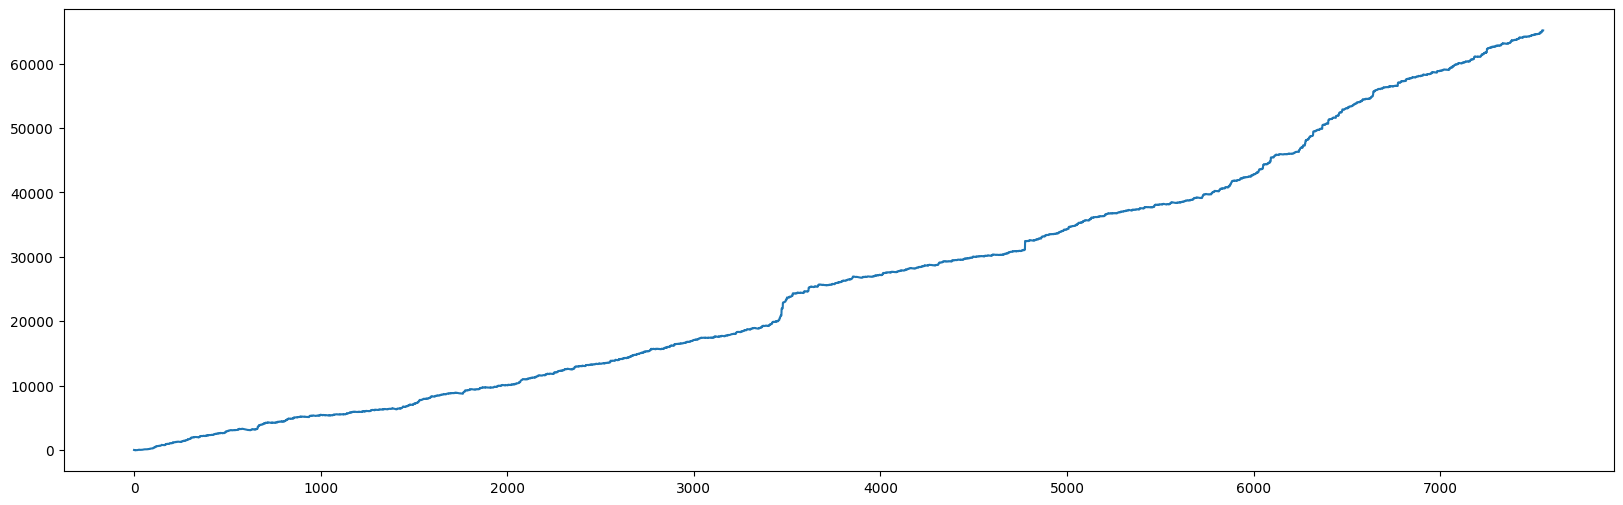

In [148]:
intraday_trade_log=pd.DataFrame(final_data)
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
intraday_trade_log['Profit'].cumsum().plot()


<Axes: >

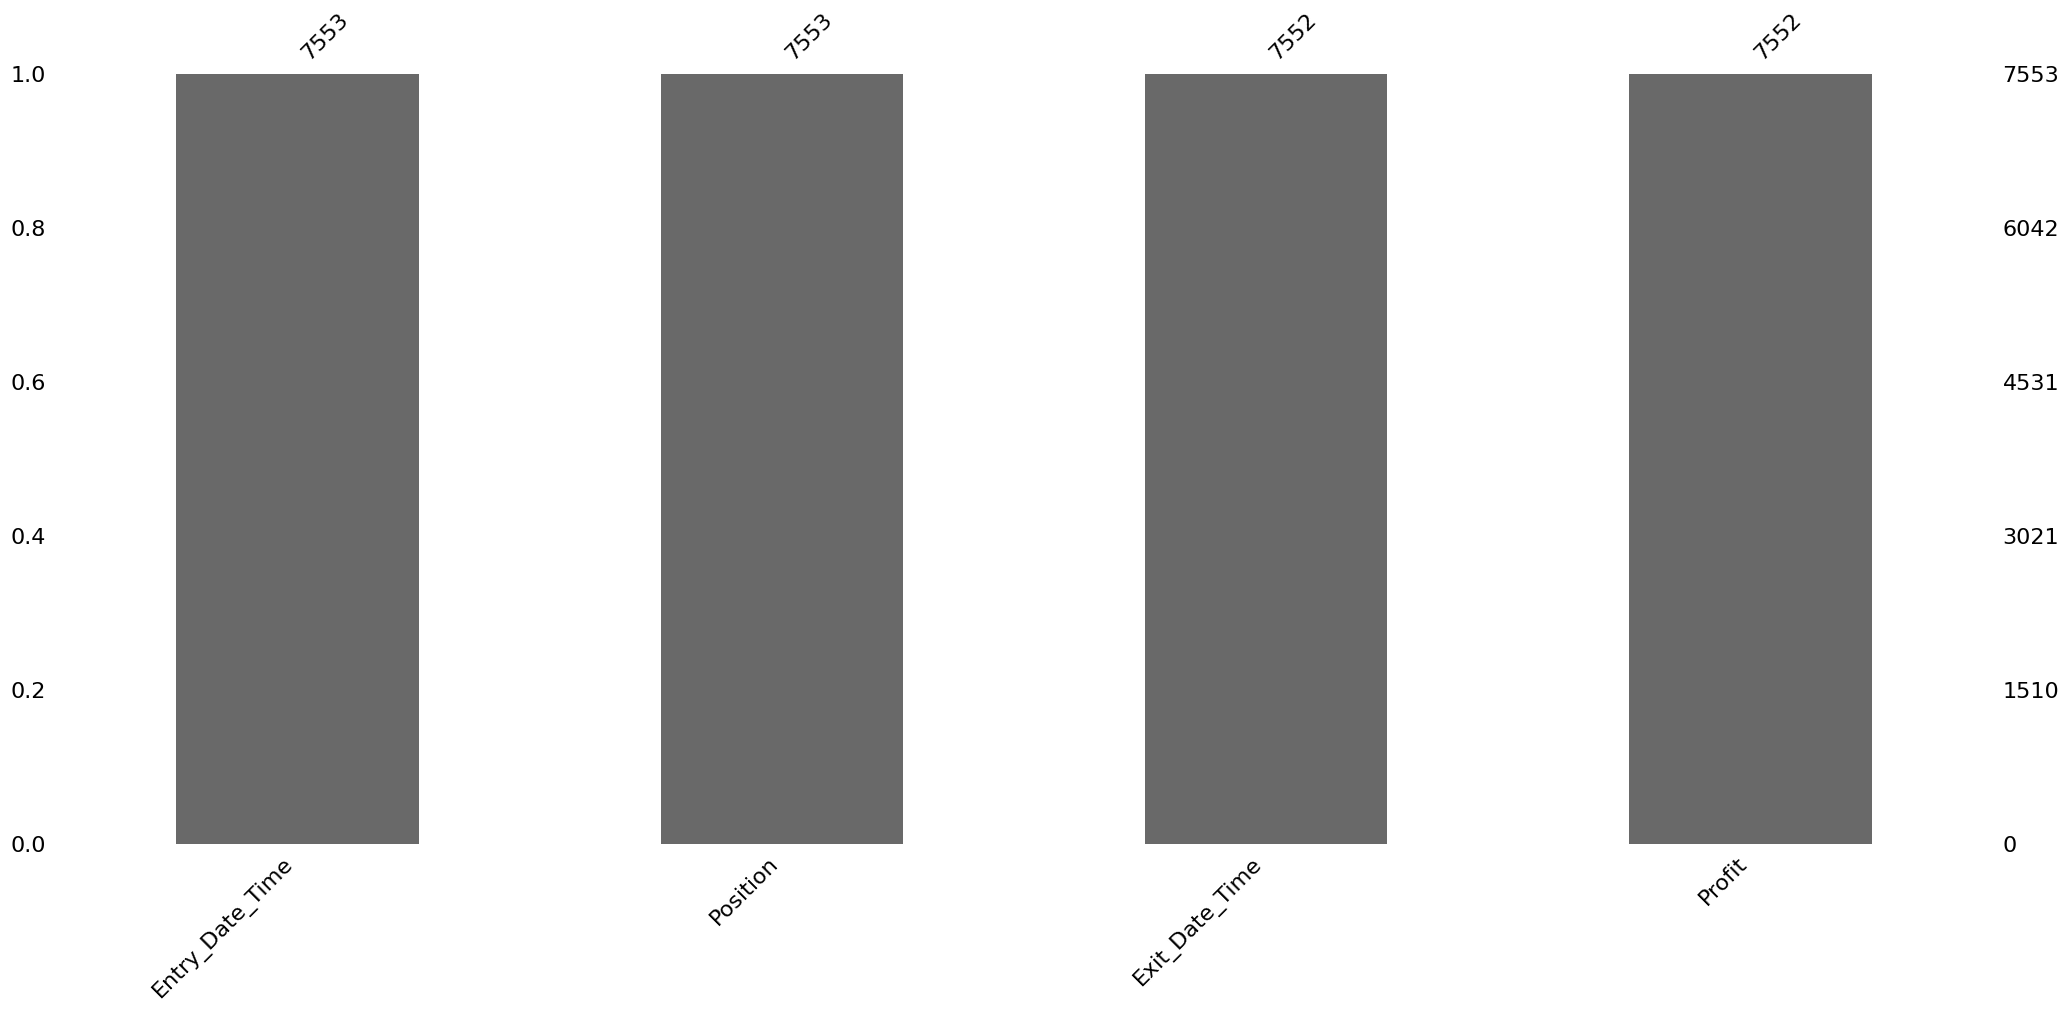

In [149]:
import missingno as msno
msno.bar(intraday_trade_log)


<class 'pandas.core.frame.DataFrame'>
Index: 7552 entries, 0 to 7551
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Entry_Date_Time  7552 non-null   datetime64[ns]
 1   Position         7552 non-null   object        
 2   Exit_Date_Time   7552 non-null   datetime64[ns]
 3   Profit           7552 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 295.0+ KB


<Axes: >

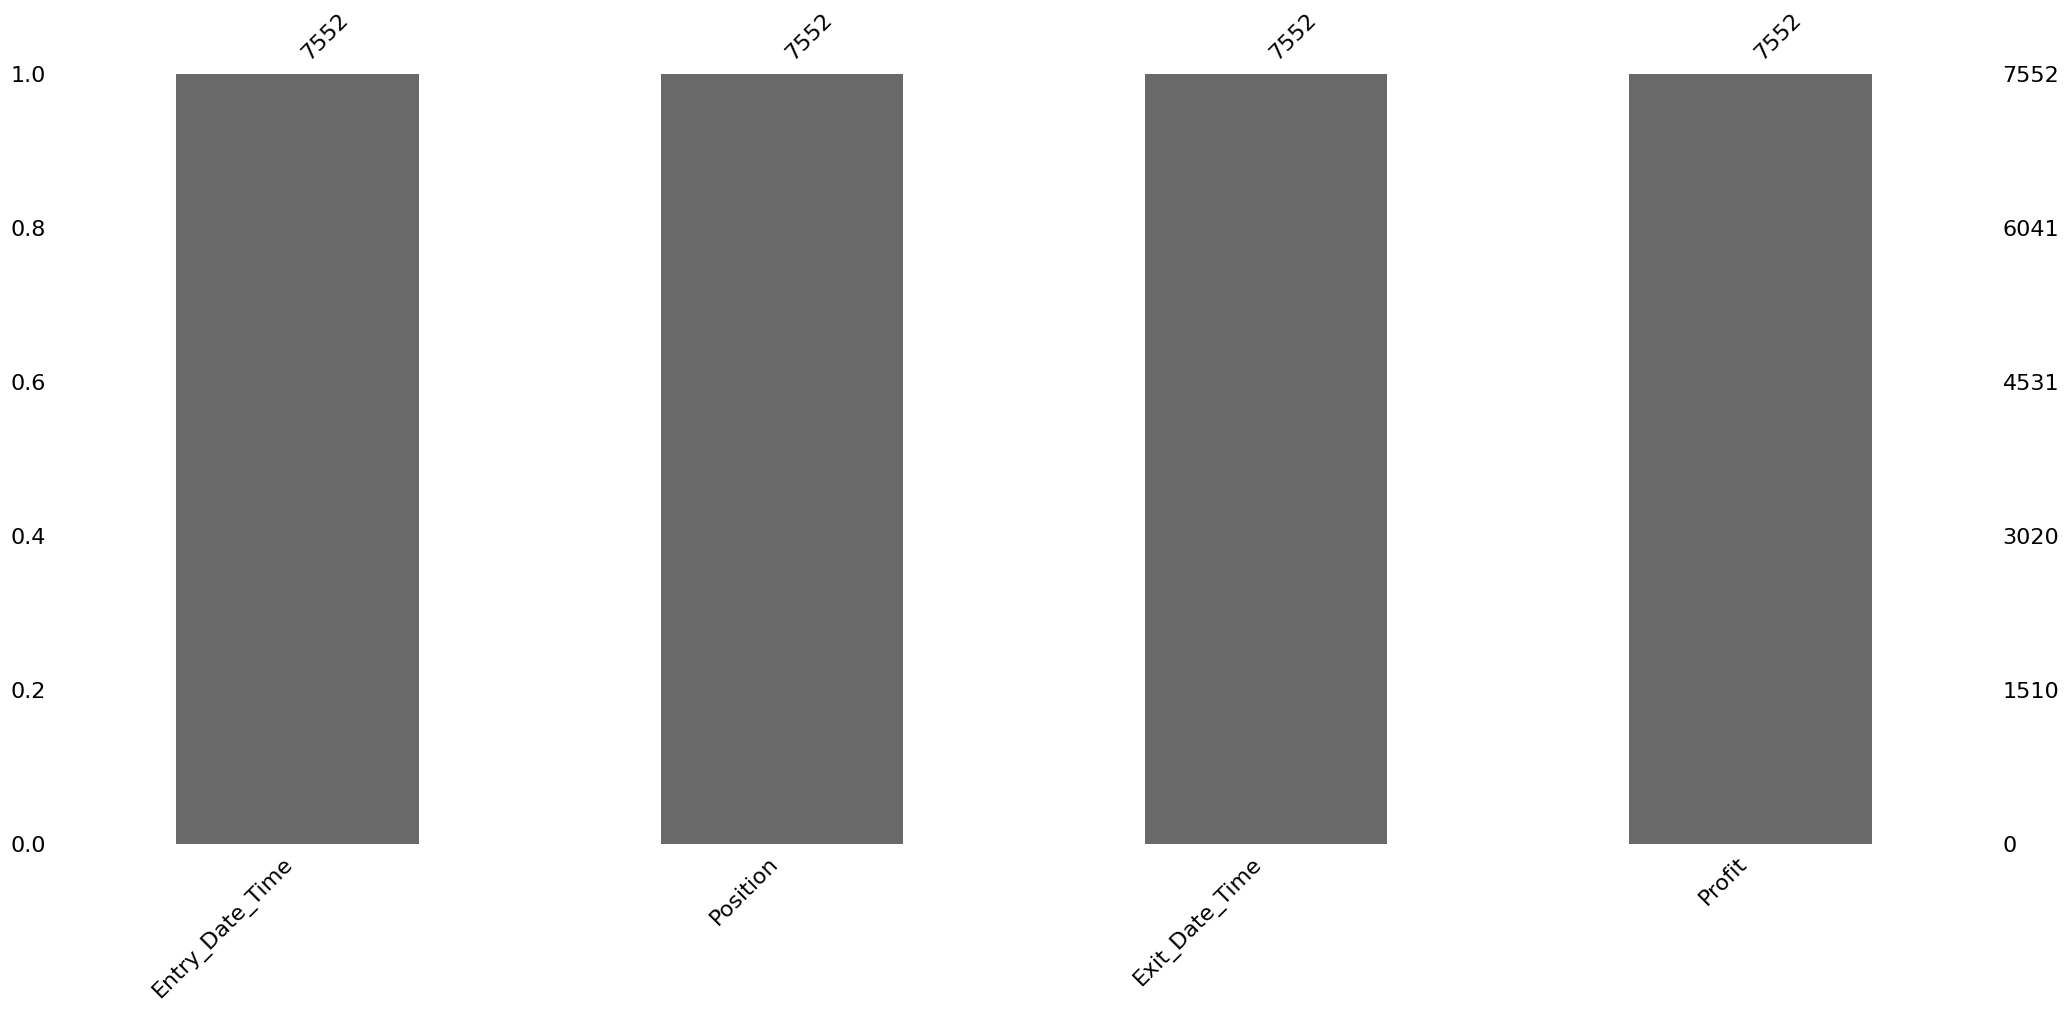

In [150]:
intraday_trade_log=intraday_trade_log[intraday_trade_log['Entry_Date_Time'].notna()]
intraday_trade_log=intraday_trade_log[intraday_trade_log['Position'].notna()]
intraday_trade_log=intraday_trade_log[intraday_trade_log['Exit_Date_Time'].notna()]
intraday_trade_log=intraday_trade_log[intraday_trade_log['Profit'].notna()]
intraday_trade_log.info()
msno.bar(intraday_trade_log)

In [151]:
insample_trade_log = intraday_trade_log[:int(len(intraday_trade_log)/2)]
outsample_trade_log = intraday_trade_log[int(len(intraday_trade_log)/2):]
insample_trade_log
outsample_trade_log


Entry_Date_Time Position      Exit_Date_Time  Profit
3776 2020-06-11 10:15:00    Short 2020-06-11 11:25:00    72.0
3777 2020-06-11 11:30:00     Long 2020-06-11 11:45:00   -12.0
3778 2020-06-11 11:55:00    Short 2020-06-11 12:05:00    18.0
3779 2020-06-11 13:45:00     Long 2020-06-11 14:00:00   -12.0
3780 2020-06-12 09:30:00     Long 2020-06-12 09:45:00   -12.0
...                  ...      ...                 ...     ...
7547 2022-12-20 13:10:00    Short 2022-12-20 13:20:00    18.0
7548 2022-12-20 13:50:00    Short 2022-12-20 14:00:00    -6.0
7549 2022-12-20 14:15:00    Short 2022-12-20 14:20:00    -6.0
7550 2022-12-20 14:30:00    Short 2022-12-20 14:35:00    -6.0
7551 2022-12-20 14:45:00    Short 2022-12-20 14:55:00    -6.0

[3776 rows x 4 columns]

In [152]:
initial_capital=200000
intraday_trade_log['Quantity']=50

In [153]:
intraday_trade_log['PnL_Including_Slippages'] = (intraday_trade_log['Profit'])*intraday_trade_log['Quantity']
intraday_trade_log

Entry_Date_Time Position      Exit_Date_Time  Profit  Quantity  \
0    2017-07-17 10:00:00    Short 2017-07-17 10:10:00   -4.00        50   
1    2017-07-17 11:45:00     Long 2017-07-17 12:15:00   -8.50        50   
2    2017-07-17 13:40:00    Short 2017-07-17 13:50:00   -3.35        50   
3    2017-07-17 14:25:00    Short 2017-07-17 14:30:00   -3.40        50   
4    2017-07-17 14:55:00    Short 2017-07-17 15:05:00   -6.00        50   
...                  ...      ...                 ...     ...       ...   
7547 2022-12-20 13:10:00    Short 2022-12-20 13:20:00   18.00        50   
7548 2022-12-20 13:50:00    Short 2022-12-20 14:00:00   -6.00        50   
7549 2022-12-20 14:15:00    Short 2022-12-20 14:20:00   -6.00        50   
7550 2022-12-20 14:30:00    Short 2022-12-20 14:35:00   -6.00        50   
7551 2022-12-20 14:45:00    Short 2022-12-20 14:55:00   -6.00        50   

      PnL_Including_Slippages  
0                      -200.0  
1                      -425.0  
2                      -167.5  
3                      -170.0  
4                      -300.0  
...                       ...  
7547                    900.0  
7548                   -300.0  
7549                   -300.0  
7550                   -300.0  
7551                   -300.0  

[7552 rows x 6 columns]

In [154]:
intraday_trade_log['PnL_Including_Slippages_Cumulative_Sum'] = intraday_trade_log['PnL_Including_Slippages'].cumsum()
intraday_trade_log

Entry_Date_Time Position      Exit_Date_Time  Profit  Quantity  \
0    2017-07-17 10:00:00    Short 2017-07-17 10:10:00   -4.00        50   
1    2017-07-17 11:45:00     Long 2017-07-17 12:15:00   -8.50        50   
2    2017-07-17 13:40:00    Short 2017-07-17 13:50:00   -3.35        50   
3    2017-07-17 14:25:00    Short 2017-07-17 14:30:00   -3.40        50   
4    2017-07-17 14:55:00    Short 2017-07-17 15:05:00   -6.00        50   
...                  ...      ...                 ...     ...       ...   
7547 2022-12-20 13:10:00    Short 2022-12-20 13:20:00   18.00        50   
7548 2022-12-20 13:50:00    Short 2022-12-20 14:00:00   -6.00        50   
7549 2022-12-20 14:15:00    Short 2022-12-20 14:20:00   -6.00        50   
7550 2022-12-20 14:30:00    Short 2022-12-20 14:35:00   -6.00        50   
7551 2022-12-20 14:45:00    Short 2022-12-20 14:55:00   -6.00        50   

      PnL_Including_Slippages  PnL_Including_Slippages_Cumulative_Sum  
0                      -200.0                                  -200.0  
1                      -425.0                                  -625.0  
2                      -167.5                                  -792.5  
3                      -170.0                                  -962.5  
4                      -300.0                                 -1262.5  
...                       ...                                     ...  
7547                    900.0                               3258305.0  
7548                   -300.0                               3258005.0  
7549                   -300.0                               3257705.0  
7550                   -300.0                               3257405.0  
7551                   -300.0                               3257105.0  

[7552 rows x 7 columns]

In [155]:
intraday_trade_log['Equity'] = 0
intraday_trade_log['Rate_of_Return'] = 0

In [156]:
for i in range(len(list(intraday_trade_log.index))):

    if i == 0:
        intraday_trade_log['Equity'].iloc[i] = initial_capital + intraday_trade_log['PnL_Including_Slippages'].iloc[i]
        intraday_trade_log['Rate_of_Return'].iloc[i] = (intraday_trade_log['PnL_Including_Slippages'].iloc[i]/initial_capital)*100
    else:
        intraday_trade_log['Equity'].iloc[i] = intraday_trade_log['Equity'].iloc[i-1] + intraday_trade_log['PnL_Including_Slippages'].iloc[i]
        intraday_trade_log['Rate_of_Return'].iloc[i] = (intraday_trade_log['PnL_Including_Slippages'].iloc[i]/intraday_trade_log['Equity'].iloc[i-1])*100

C:\Users\A\AppData\Local\Temp\ipykernel_9764\138033945.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intraday_trade_log['Equity'].iloc[i] = initial_capital + intraday_trade_log['PnL_Including_Slippages'].iloc[i]
C:\Users\A\AppData\Local\Temp\ipykernel_9764\138033945.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intraday_trade_log['Rate_of_Return'].iloc[i] = (intraday_trade_log['PnL_Including_Slippages'].iloc[i]/initial_capital)*100
C:\Users\A\AppData\Local\Temp\ipykernel_9764\138033945.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 

In [157]:
win_rate = round(len(intraday_trade_log[intraday_trade_log['PnL_Including_Slippages']>0])/len(intraday_trade_log),2)
print(f'Win Rate:{win_rate}')

Win Rate:0.33


In [158]:
mean_win = intraday_trade_log[intraday_trade_log['PnL_Including_Slippages']>0]['PnL_Including_Slippages'].mean()
mean_loss = intraday_trade_log[intraday_trade_log['PnL_Including_Slippages']<0]['PnL_Including_Slippages'].mean()
risk_reward = abs(mean_win/mean_loss)
expectancy = round((win_rate*risk_reward) - ((1-win_rate)*1),2)

print(f'Expectancy:{expectancy}')

Expectancy:1.23


In [159]:
import numpy as np
number_of_trading_days_in_a_year = 252
risk_free_interest_rate = 5
mean = intraday_trade_log['Rate_of_Return'].mean() * number_of_trading_days_in_a_year - risk_free_interest_rate
sigma = intraday_trade_log['Rate_of_Return'].std() * np.sqrt(number_of_trading_days_in_a_year)
sharpe_ratio = round(mean/sigma,2)

print(f'Sharpe Ratio:{sharpe_ratio}')

Sharpe Ratio:1.55


In [160]:
downside_standard_deviation = intraday_trade_log[intraday_trade_log['Rate_of_Return']<0]['Rate_of_Return'].std() * np.sqrt(number_of_trading_days_in_a_year)
sortino_ratio = round(mean/downside_standard_deviation,2)
print(f'Sortino Ratio:{sortino_ratio}')

Sortino Ratio:8.43


In [162]:
intraday_trade_log['Drawdown'] = intraday_trade_log['PnL_Including_Slippages_Cumulative_Sum'] - intraday_trade_log['PnL_Including_Slippages_Cumulative_Sum'].cummax()
max_drawdown = round(intraday_trade_log['Drawdown'].min(),2)
print(f'Max Drawdown [Rs.] :{max_drawdown}')

max_drawdown_percent = round(max_drawdown/intraday_trade_log[intraday_trade_log['Drawdown'] == intraday_trade_log['Drawdown'].min()]['Equity'].iloc[0]*100,2)
print(f'Max Drawdown Percent:{max_drawdown_percent}')

Max Drawdown [Rs.] :-12225.0
Max Drawdown Percent:-3.46


In [163]:
intraday_trade_log['Recovery'] = 0
for i in range(len(intraday_trade_log)):
    if (intraday_trade_log['Drawdown'].iloc[i] < 0):
        intraday_trade_log['Recovery'].iloc[i] = intraday_trade_log['Recovery'].iloc[i-1] + 1
recovery_trades = intraday_trade_log['Recovery'].max()
print(f'Number of trades done from Drawdown to achieve a new peak: {recovery_trades}')



C:\Users\A\AppData\Local\Temp\ipykernel_9764\1759126011.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intraday_trade_log['Recovery'].iloc[i] = intraday_trade_log['Recovery'].iloc[i-1] + 1
C:\Users\A\AppData\Local\Temp\ipykernel_9764\1759126011.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intraday_trade_log['Recovery'].iloc[i] = intraday_trade_log['Recovery'].iloc[i-1] + 1
C:\Users\A\AppData\Local\Temp\ipykernel_9764\1759126011.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

Number of trades done from Drawdown to achieve a new peak: 82


C:\Users\A\AppData\Local\Temp\ipykernel_9764\1759126011.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intraday_trade_log['Recovery'].iloc[i] = intraday_trade_log['Recovery'].iloc[i-1] + 1
C:\Users\A\AppData\Local\Temp\ipykernel_9764\1759126011.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intraday_trade_log['Recovery'].iloc[i] = intraday_trade_log['Recovery'].iloc[i-1] + 1
C:\Users\A\AppData\Local\Temp\ipykernel_9764\1759126011.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [164]:
recovery_trades = intraday_trade_log['Recovery'].max()
print(f'Number of trades done from Drawdown to achieve a new peak: {recovery_trades}')

Number of trades done from Drawdown to achieve a new peak: 82


In [165]:
 

intraday_trade_log_equity_high = intraday_trade_log[intraday_trade_log['Recovery'] == 0]

intraday_trade_log_equity_high['Entry_Datetime'] = pd.to_datetime(intraday_trade_log_equity_high['Entry_Datetime'])

intraday_trade_log_equity_high['number_days_between_equity_highs'] = intraday_trade_log_equity_high['Entry_Datetime'] - intraday_trade_log_equity_high['Entry_Datetime'].shift()

recovery_days = intraday_trade_log_equity_high['number_days_between_equity_highs'].apply(lambda x: x.days).max()

print(f'Number of Days taken from Drawdown to achieve a new peak: {recovery_days}')


KeyError: 'Entry_Datetime'

In [166]:
intraday_trade_log.head()

Entry_Date_Time Position      Exit_Date_Time  Profit  Quantity  \
0 2017-07-17 10:00:00    Short 2017-07-17 10:10:00   -4.00        50   
1 2017-07-17 11:45:00     Long 2017-07-17 12:15:00   -8.50        50   
2 2017-07-17 13:40:00    Short 2017-07-17 13:50:00   -3.35        50   
3 2017-07-17 14:25:00    Short 2017-07-17 14:30:00   -3.40        50   
4 2017-07-17 14:55:00    Short 2017-07-17 15:05:00   -6.00        50   

   PnL_Including_Slippages  PnL_Including_Slippages_Cumulative_Sum    Equity  \
0                   -200.0                                  -200.0  199800.0   
1                   -425.0                                  -625.0  199375.0   
2                   -167.5                                  -792.5  199207.5   
3                   -170.0                                  -962.5  199037.5   
4                   -300.0                                 -1262.5  198737.5   

   Rate_of_Return  Drawdown  Recovery  
0       -0.100000       0.0         0  
1       -0.212713    -425.0         1  
2       -0.084013    -592.5         2  
3       -0.085338    -762.5         3  
4       -0.150725   -1062.5         4

In [168]:
intraday_trade_log_equity_high = intraday_trade_log[intraday_trade_log['Recovery'] == 0]

intraday_trade_log_equity_high['Entry_Date_Time'] = pd.to_datetime(intraday_trade_log_equity_high['Entry_Date_Time'])

intraday_trade_log_equity_high['number_days_between_equity_highs'] = intraday_trade_log_equity_high['Entry_Date_Time'] - intraday_trade_log_equity_high['Entry_Date_Time'].shift()

recovery_days = intraday_trade_log_equity_high['number_days_between_equity_highs'].apply(lambda x: x.days).max()

print(f'Number of Days taken from Drawdown to achieve a new peak: {recovery_days}')

C:\Users\A\AppData\Local\Temp\ipykernel_9764\1347973414.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intraday_trade_log_equity_high['Entry_Date_Time'] = pd.to_datetime(intraday_trade_log_equity_high['Entry_Date_Time'])
C:\Users\A\AppData\Local\Temp\ipykernel_9764\1347973414.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intraday_trade_log_equity_high['number_days_between_equity_highs'] = intraday_trade_log_equity_high['Entry_Date_Time'] - intraday_trade_log_equity_high['Entry_Date_Time'].shift()

Number of Days taken from Drawdown to achieve a new peak: 24.0


In [169]:

intraday_trade_log['Entry_Date_Time'] = pd.to_datetime(intraday_trade_log['Entry_Date_Time'])
number_of_trading_days_for_this_backtest = (intraday_trade_log.iloc[-1]['Entry_Date_Time'].date() - intraday_trade_log.iloc[0]['Entry_Date_Time'].date()).days
cagr = (((intraday_trade_log.iloc[-1]['Equity'] / initial_capital) ** (1 / (number_of_trading_days_for_this_backtest / 365))) - 1) * 100
cagr = round(cagr, 2)
print(f'CAGR: {cagr}%')


CAGR: 69.02%


In [170]:
calmar_ratio = round(abs(cagr/max_drawdown_percent),2)

print(f'Calmar Ratio:{calmar_ratio}')

Calmar Ratio:19.95


In [173]:
backtest_start_date = intraday_trade_log.iloc[0]['Entry_Date_Time'].date()
backtest_start_date
backtest_end_date = intraday_trade_log.iloc[-1]['Entry_Date_Time'].date()
backtest_end_date


datetime.date(2022, 12, 20)

In [174]:
number_of_trades = len(intraday_trade_log)
number_of_trades

7552

In [175]:
number_of_wins = len(intraday_trade_log[intraday_trade_log['PnL_Including_Slippages']>0])
print(f'Number of Wins: {number_of_wins}')

number_of_losses = len(intraday_trade_log[intraday_trade_log['PnL_Including_Slippages']<0])
print(f'Number of Losses: {number_of_losses}')

Number of Wins: 2483
Number of Losses: 5065


In [176]:
average_profit_per_trade = round(intraday_trade_log[intraday_trade_log['PnL_Including_Slippages'] > 0]['PnL_Including_Slippages'].mean(),2)
print(f'Average Profit Per Trade: {average_profit_per_trade}')

average_loss_per_trade = round(intraday_trade_log[intraday_trade_log['PnL_Including_Slippages'] < 0]['PnL_Including_Slippages'].mean(),2)
print(f'Average Loss Per Trade: {average_loss_per_trade}')

Average Profit Per Trade: 2032.24
Average Loss Per Trade: -353.2


In [177]:
max_pnl = round(intraday_trade_log['PnL_Including_Slippages'].max(),2)
print(f'Max PnL Point:{max_pnl}')

min_pnl = round(intraday_trade_log['PnL_Including_Slippages'].min(),2)
print(f'Min PnL Point:{min_pnl}')

Max PnL Point:64200.0
Min PnL Point:-600.0


In [178]:
median_of_trade = round(intraday_trade_log['PnL_Including_Slippages'].median(),2)
print(f'Median:{median_of_trade}')

Median:-300.0


In [179]:
gross_profit = intraday_trade_log[intraday_trade_log['PnL_Including_Slippages']>0]['PnL_Including_Slippages'].sum()
gross_loss = intraday_trade_log[intraday_trade_log['PnL_Including_Slippages']<0]['PnL_Including_Slippages'].sum()

profit_factor = round(abs(gross_profit/gross_loss),2)
print(f'Profit Factor:{profit_factor}')
# did't remove outlier profit factor

Profit Factor:2.82


In [180]:
outlier_adjusted_profit_factor = round(abs((gross_profit-max_pnl)/gross_loss),2)
print(f'Outlier Adjusted Profit Factor:{outlier_adjusted_profit_factor}')

Outlier Adjusted Profit Factor:2.78


In [181]:
intraday_trade_log['Continuous_Wins'] = 0
intraday_trade_log['Continuous_Losses'] = 0

In [182]:
for i in range(1,len(intraday_trade_log)):
    if intraday_trade_log['PnL_Including_Slippages'].iloc[i-1] > 0:
        intraday_trade_log['Continuous_Wins'].iloc[i] = intraday_trade_log['Continuous_Wins'].iloc[i-1]+1
    if intraday_trade_log['PnL_Including_Slippages'].iloc[i-1] < 0:
        intraday_trade_log['Continuous_Losses'].iloc[i] = intraday_trade_log['Continuous_Losses'].iloc[i-1]+1

C:\Users\A\AppData\Local\Temp\ipykernel_9764\1117506453.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intraday_trade_log['Continuous_Losses'].iloc[i] = intraday_trade_log['Continuous_Losses'].iloc[i-1]+1
C:\Users\A\AppData\Local\Temp\ipykernel_9764\1117506453.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intraday_trade_log['Continuous_Losses'].iloc[i] = intraday_trade_log['Continuous_Losses'].iloc[i-1]+1
C:\Users\A\AppData\Local\Temp\ipykernel_9764\1117506453.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

In [183]:
consecutive_wins = intraday_trade_log['Continuous_Wins'].max()
consecutive_losses = intraday_trade_log['Continuous_Losses'].max()
print(f'Consecutive Wins:{consecutive_wins}')
print(f'Consecutive Losses:{consecutive_losses}')

Consecutive Wins:9
Consecutive Losses:34


In [184]:
metrics = pd.DataFrame(columns=['Backtest Start Date','Backtest End Date','Number of Trades','Number of Wins','Number of Losses','Average Profit','Average Loss','Maximum Profit Points','Maximum Loss Points','Median Trade','Win Rate','Expectancy','Sharpe Ratio','Sortino Ratio','Max Drawdown','Max Drawdown Percent','Days Taken to Recover From Drawdown','Number of Trades to Recover From Drawdown','Calmar','CAGR','Consecutive Wins','Consecutive Losses','Profit Factor (Amount of Profit per unit of Loss)','Outlier Adjusted Profit Factor (Profit Factor except that One Exceptional Biggest Winner)'])

In [185]:
import pandas as pd

metrics_data = []

metrics_dict = {
    'Backtest Start Date': backtest_start_date,
    'Backtest End Date': backtest_end_date,
    'Number of Trades': number_of_trades,
    'Number of Wins': number_of_wins,
    'Number of Losses': number_of_losses,
    'Average Profit': average_profit_per_trade,
    'Average Loss': average_loss_per_trade,
    'Maximum Profit Points': max_pnl,
    'Maximum Loss Points': min_pnl,
    'Median Trade': median_of_trade,
    'Win Rate': win_rate,
    'Expectancy': expectancy,
    'Sharpe Ratio': sharpe_ratio,
    'Sortino Ratio': sortino_ratio,
    'Max Drawdown': max_drawdown,
    'Max Drawdown Percent': max_drawdown_percent,
    'Days Taken to Recover From Drawdown': recovery_days,
    'Number of Trades to Recover From Drawdown': recovery_trades,
    'Calmar': calmar_ratio,
    'CAGR': cagr,
    'Consecutive Wins': consecutive_wins,
    'Consecutive Losses': consecutive_losses,
    'Profit Factor (Amount of Profit per unit of Loss)': profit_factor,
    'Outlier Adjusted Profit Factor (Profit Factor except that One Exceptional Biggest Winner)': outlier_adjusted_profit_factor
}

metrics_data.append(metrics_dict)

metrics = pd.DataFrame(metrics_data)


In [186]:
metrics.T

0
Backtest Start Date                                 2017-07-17
Backtest End Date                                   2022-12-20
Number of Trades                                          7552
Number of Wins                                            2483
Number of Losses                                          5065
Average Profit                                         2032.24
Average Loss                                            -353.2
Maximum Profit Points                                  64200.0
Maximum Loss Points                                     -600.0
Median Trade                                            -300.0
Win Rate                                                  0.33
Expectancy                                                1.23
Sharpe Ratio                                              1.55
Sortino Ratio                                             8.43
Max Drawdown                                          -12225.0
Max Drawdown Percent                                     -3.46
Days Taken to Recover From Drawdown                       24.0
Number of Trades to Recover From Drawdown                   82
Calmar                                                   19.95
CAGR                                                     69.02
Consecutive Wins                                             9
Consecutive Losses                                          34
Profit Factor (Amount of Profit per unit of Loss)         2.82
Outlier Adjusted Profit Factor (Profit Factor e...        2.78

In [189]:
returns = intraday_trade_log[['Entry_Date_Time','Equity']]
returns.set_index('Entry_Date_Time',inplace=True)
returns = returns.resample('M').last()
returns['%Change'] = returns['Equity'].pct_change()*100
returns.reset_index(inplace=True)
returns['Year'] = returns['Entry_Date_Time'].apply(lambda x: x.year)
returns['Month'] = returns['Entry_Date_Time'].apply(lambda x: x.month)
import calendar
returns['Month'] = returns['Month'].apply(lambda x: calendar.month_abbr[x])
returns = returns[['Entry_Date_Time', '%Change', 'Year', 'Month']]
x = returns.groupby(['Year','Month'])['%Change'].mean()
broad_returns = x.unstack()
broad_returns['Total'] = broad_returns[broad_returns.columns].sum(axis=1)
broad_returns = broad_returns[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Total']]
broad_returns = round(broad_returns,2)
broad_returns

Month   Jan    Feb    Mar   Apr   May   Jun   Jul    Aug   Sep    Oct   Nov  \
Year                                                                          
2017    NaN    NaN    NaN   NaN   NaN   NaN   NaN  20.28  9.62  13.38  7.50   
2018   1.05  15.50   6.78  4.92  1.23  5.95  2.37   1.86  7.38  11.30  3.08   
2019   2.99   6.53   4.07  4.12  5.47  2.57  5.09   7.05  1.61   4.44  2.45   
2020   4.46   3.62  16.52  5.35  1.51  4.32  1.01   2.36  2.57   1.56  2.23   
2021   2.47   4.71   3.98  4.57  1.69  1.59  1.81   1.52  3.46   3.64  3.32   
2022   3.25   5.75   4.68  2.54  3.23  2.23  1.76   1.87  2.70   2.10  1.62   

Month   Dec  Total  
Year                
2017   7.54  58.33  
2018   6.62  68.04  
2019   2.43  48.83  
2020   0.93  46.45  
2021   5.40  38.16  
2022   1.38  33.11

In [190]:
import seaborn as sns

# Create a colormap
cm = sns.light_palette('green', as_cmap=True)

# Apply background gradient and highlighting to the DataFrame
broad_returns_image = broad_returns.style.background_gradient(cmap=cm, axis=0)\
    .highlight_min(axis=0, color='lightgreen')\
    .highlight_max(axis=0, color='green')\
    .format('{:.2f}')

# You can display the styled DataFrame
broad_returns_image


In [192]:
intraday_trade_log['Date']=intraday_trade_log['Entry_Date_Time'].apply(lambda x: x.date())
drawdown_values = intraday_trade_log['Drawdown'].drop_duplicates().nsmallest(5)
drawdown_df = intraday_trade_log[intraday_trade_log['Drawdown'].isin(list(drawdown_values.values))].copy()

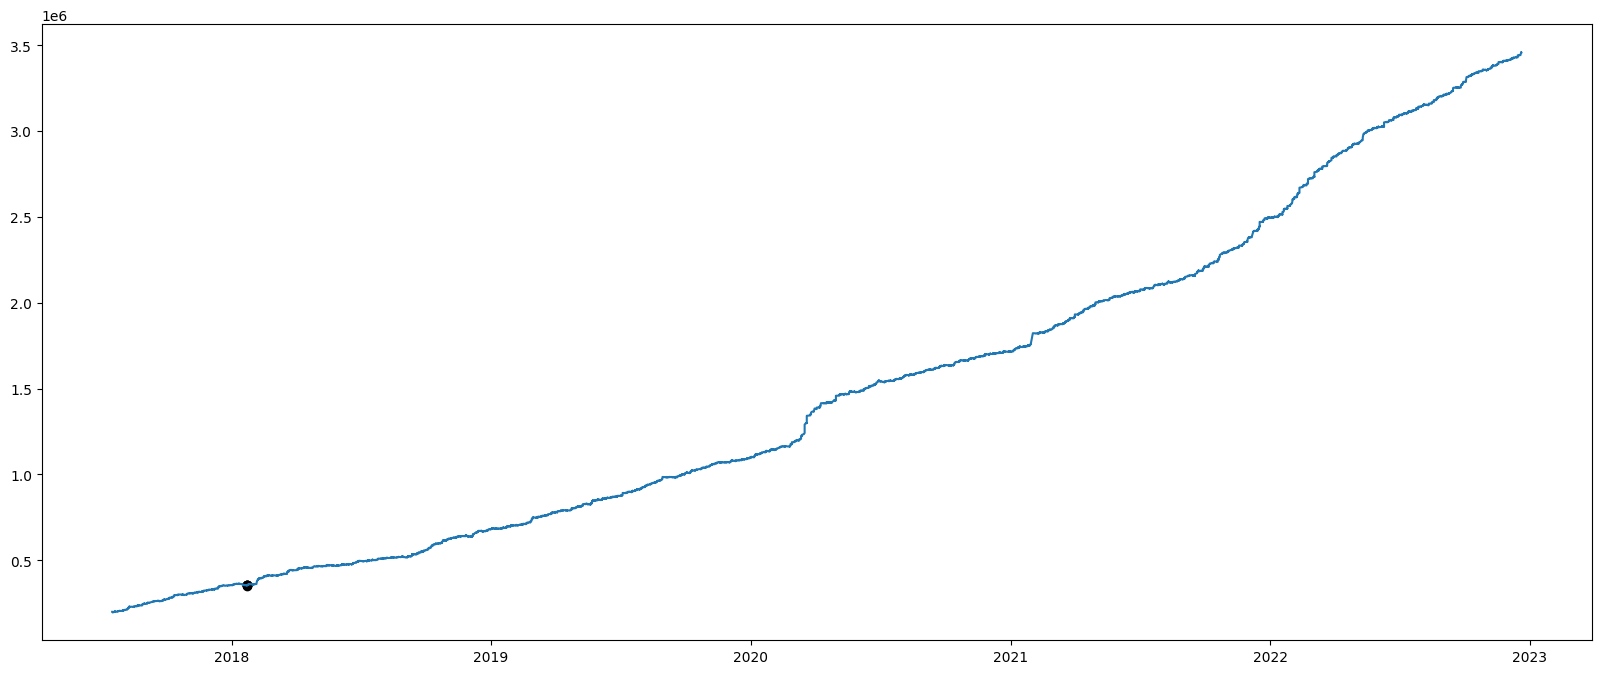

In [193]:

drawdown_figure = plt.figure(figsize=(20,8))
plt.plot(intraday_trade_log['Date'],intraday_trade_log['Equity'])
plt.scatter(drawdown_df['Date'],drawdown_df['Equity'],color='black')

C:\Users\A\AppData\Local\Temp\ipykernel_9764\1383921434.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(x='Month-Year', y='%Change', data=returns, estimator=np.median, ci=0)
C:\Users\A\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\A\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\A\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype)

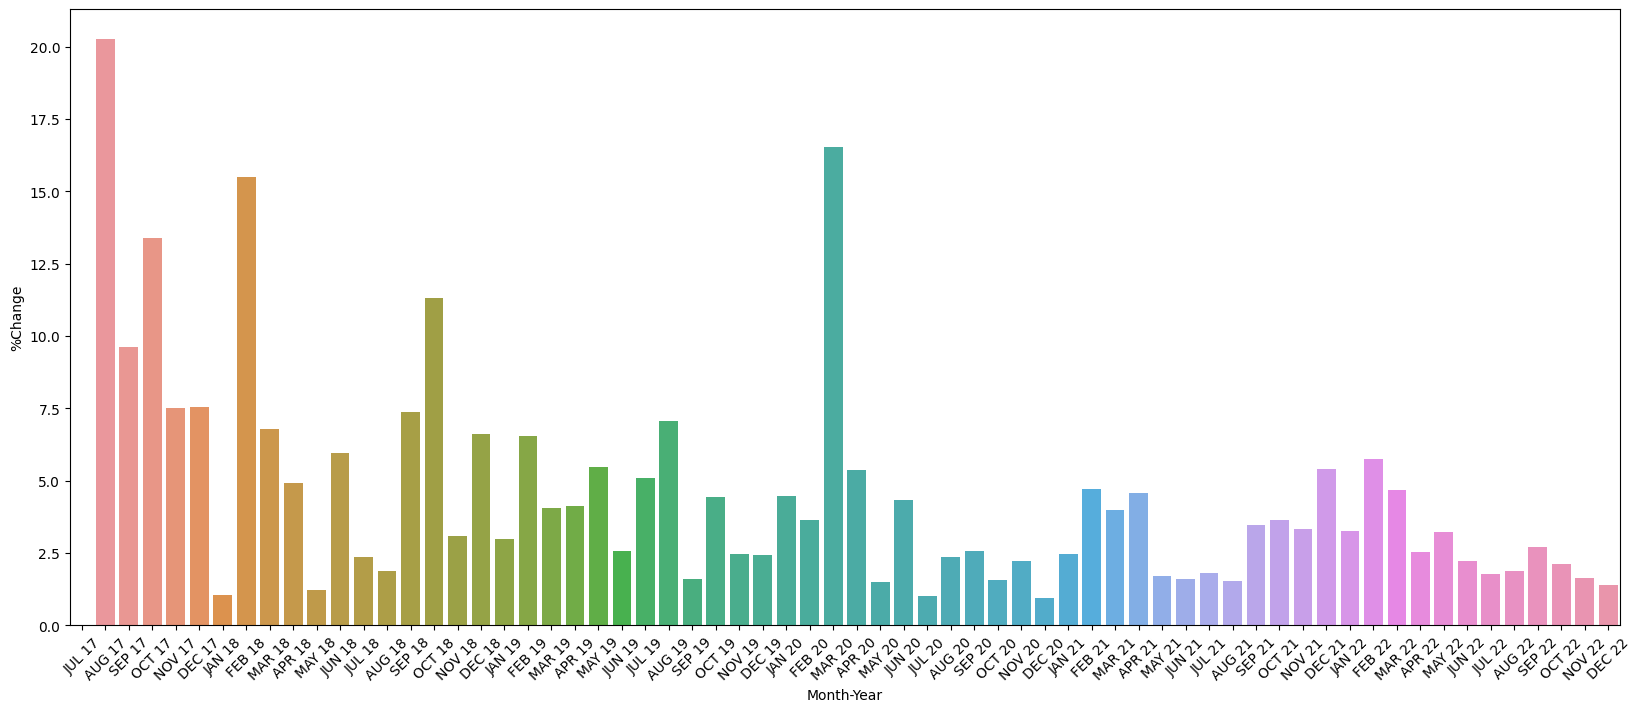

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

returns['Month-Year'] = returns.apply(lambda x: (str(x['Month']) + ' ' + str(x['Year'])[-2:]).upper(), axis=1)

plt.figure(figsize=(20, 8))
sns.barplot(x='Month-Year', y='%Change', data=returns, estimator=np.median, ci=0)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees for better visibility
plt.show()


In [195]:
metrics.T


0
Backtest Start Date                                 2017-07-17
Backtest End Date                                   2022-12-20
Number of Trades                                          7552
Number of Wins                                            2483
Number of Losses                                          5065
Average Profit                                         2032.24
Average Loss                                            -353.2
Maximum Profit Points                                  64200.0
Maximum Loss Points                                     -600.0
Median Trade                                            -300.0
Win Rate                                                  0.33
Expectancy                                                1.23
Sharpe Ratio                                              1.55
Sortino Ratio                                             8.43
Max Drawdown                                          -12225.0
Max Drawdown Percent                                     -3.46
Days Taken to Recover From Drawdown                       24.0
Number of Trades to Recover From Drawdown                   82
Calmar                                                   19.95
CAGR                                                     69.02
Consecutive Wins                                             9
Consecutive Losses                                          34
Profit Factor (Amount of Profit per unit of Loss)         2.82
Outlier Adjusted Profit Factor (Profit Factor e...        2.78

In [196]:
broad_returns_image

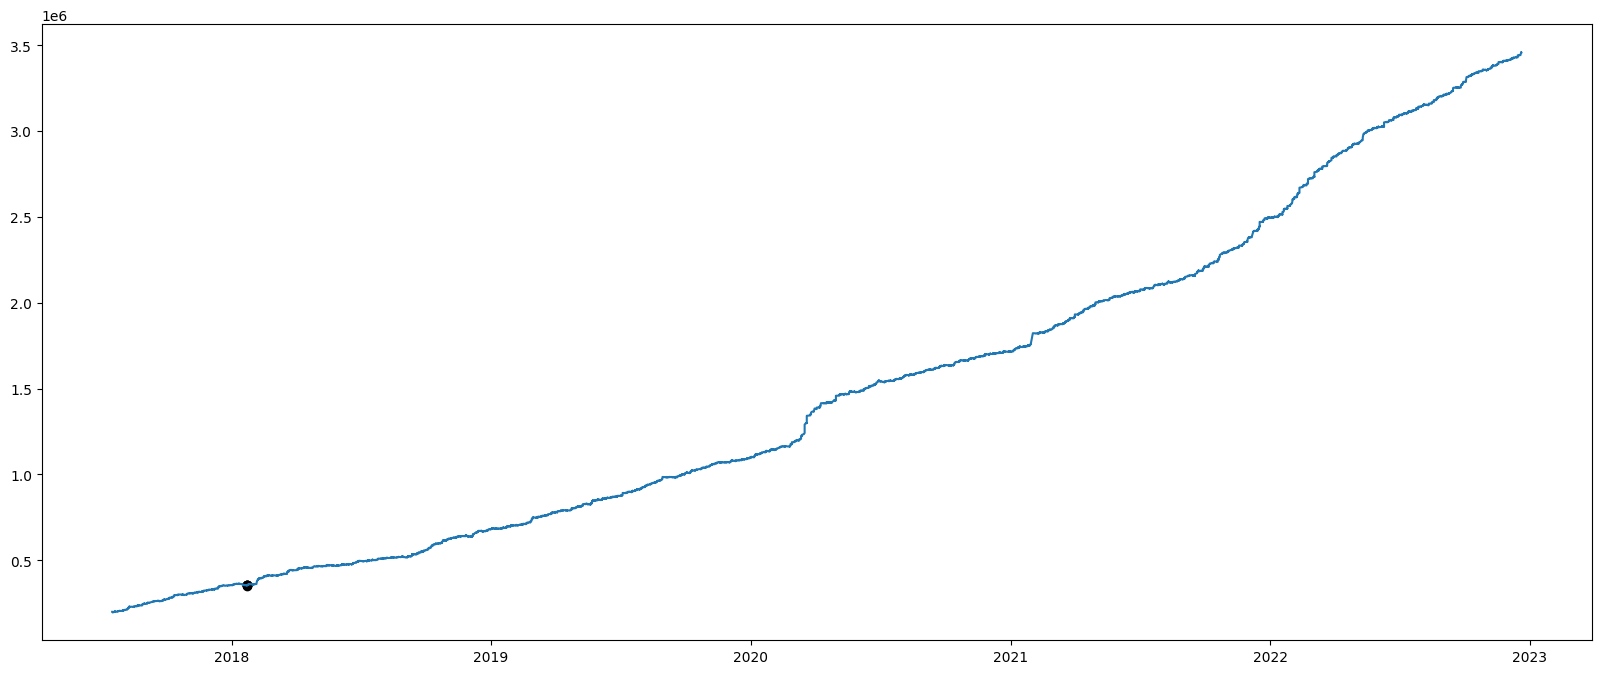

In [197]:
drawdown_figure
